In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
# Load data about football clubs
clubs_info_df = pd.read_json("../../parsing/parsedData/complete_clubs.json")
clubs_info_df.head(15)

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio
0,1002,2014,"4,25 млн €","21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN
1,1002,2015,"3,60 млн €","21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82
2,1002,2016,"3,48 млн €","21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19
3,1002,2017,"3,55 млн €","21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97
4,1002,2018,"5,80 млн €","22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05
5,1002,2019,"4,68 млн €","21,4",5,38,"[198981, 324448, 169963, 363402, 549282, 73962...",14,0.97
6,1002,2020,"5,15 млн €","21,0",3,40,"[198981, 324448, 242044, 363402, 739626, 24736...",16,1.05
7,1002,2021,"5,75 млн €","22,4",3,37,"[198981, 324448, 242044, 363402, 402119, 57422...",17,0.93
8,1002,2022,"5,06 млн €","22,3",3,38,"[242044, 324448, 363402, 402119, 198988, 24736...",14,1.03
9,1002,2023,"5,33 млн €","21,2",5,51,"[363402, 402119, 324448, 488270, 927920, 24736...",15,1.34


In [3]:
# Show shape
clubs_info_df.shape

(5896, 9)

In [4]:
# Drop columns that we will not need: "TeamCost", "Legioners", "TeamSize", "PlayerIDS", "NationalPlayersCount", and "TeamSizeRatio", we will not need them
clubs_info_df.drop(["TeamCost", "Legioners", "TeamSize", "PlayerIDS", "NationalPlayersCount", "TeamSizeRatio"], axis=1, inplace=True)
clubs_info_df.head(15)

,TeamID,Year,AverageAge
0,1002,2014,"21,5"
1,1002,2015,"21,6"
2,1002,2016,"21,0"
3,1002,2017,"21,3"
4,1002,2018,"22,4"
5,1002,2019,"21,4"
6,1002,2020,"21,0"
7,1002,2021,"22,4"
8,1002,2022,"22,3"
9,1002,2023,"21,2"


In [5]:
# Check axes
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'AverageAge'], dtype='object')]

We see extra space after "TeamID" column name, let us remove it

In [6]:
# Remove extra symbols from columns
clubs_info_df.columns = clubs_info_df.columns.str.strip() 

In [7]:
# Verify
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID', 'Year', 'AverageAge'], dtype='object')]

In [8]:
# Check for NaNs
clubs_info_df.isna().sum()

TeamID          0
Year            0
AverageAge    153
dtype: int64

In [9]:
# Let us obtain some statistics
clubs_info_df.AverageAge.describe()

count     5743
unique     139
top       25,5
freq       168
Name: AverageAge, dtype: object

We did not obtain much, and probably the problem is that AverageAge is represented as a string

In [10]:
# Check data types
clubs_info_df.dtypes

TeamID         int64
Year           int64
AverageAge    object
dtype: object

Exactly! Then we have to process this column

In [11]:
# Replace commnas with dots in "AverageAge" column and convert to float
clubs_info_df["AverageAge"] = clubs_info_df["AverageAge"].str.replace(",", ".").astype(float)
clubs_info_df.head(10)

,TeamID,Year,AverageAge
0,1002,2014,21.5
1,1002,2015,21.6
2,1002,2016,21.0
3,1002,2017,21.3
4,1002,2018,22.4
5,1002,2019,21.4
6,1002,2020,21.0
7,1002,2021,22.4
8,1002,2022,22.3
9,1002,2023,21.2


In [12]:
# Try decribe one more time
clubs_info_df.AverageAge.describe()

count    5743.000000
mean       25.032823
std         1.769775
min        16.500000
25%        24.000000
50%        25.100000
75%        26.100000
max        38.200000
Name: AverageAge, dtype: float64

In [13]:
# Okay, let us see the scale of this problem
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"AverageAge": "count"}) \
    .rename(columns={"AverageAge": "Count"})

,TeamID,Count
0,3,11
1,5,11
2,11,11
3,12,11
4,13,11
...,...,...
531,64534,6
532,64780,11
533,69752,6
534,80996,5


In [14]:
# Now select the rows with "Count" values below 11
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"AverageAge": "count"}) \
    .rename(columns={"AverageAge": "Count"}) \
    .query("Count < 11")

,TeamID,Count
178,1007,8
251,2782,10
256,2861,10
265,3137,9
270,3461,10
275,3592,7
276,3649,8
309,5228,6
342,6993,8
358,8715,8


In [15]:
# Investigate shape of those teams
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"AverageAge": "count"}) \
    .rename(columns={"AverageAge": "Count"}) \
    .query("Count < 11") \
    .shape

(53, 2)

In [16]:
# Drop rows that coincide with ones above
clubs_info_df.drop(index=clubs_info_df.groupby("TeamID", as_index=False) \
                    .agg({"AverageAge": "count"}) \
                    .query("AverageAge < 11") \
                    .index,
                    inplace=True)

Note: we treat each clun in each year as a standalone club because from season to season it is a subject to change in many aspects

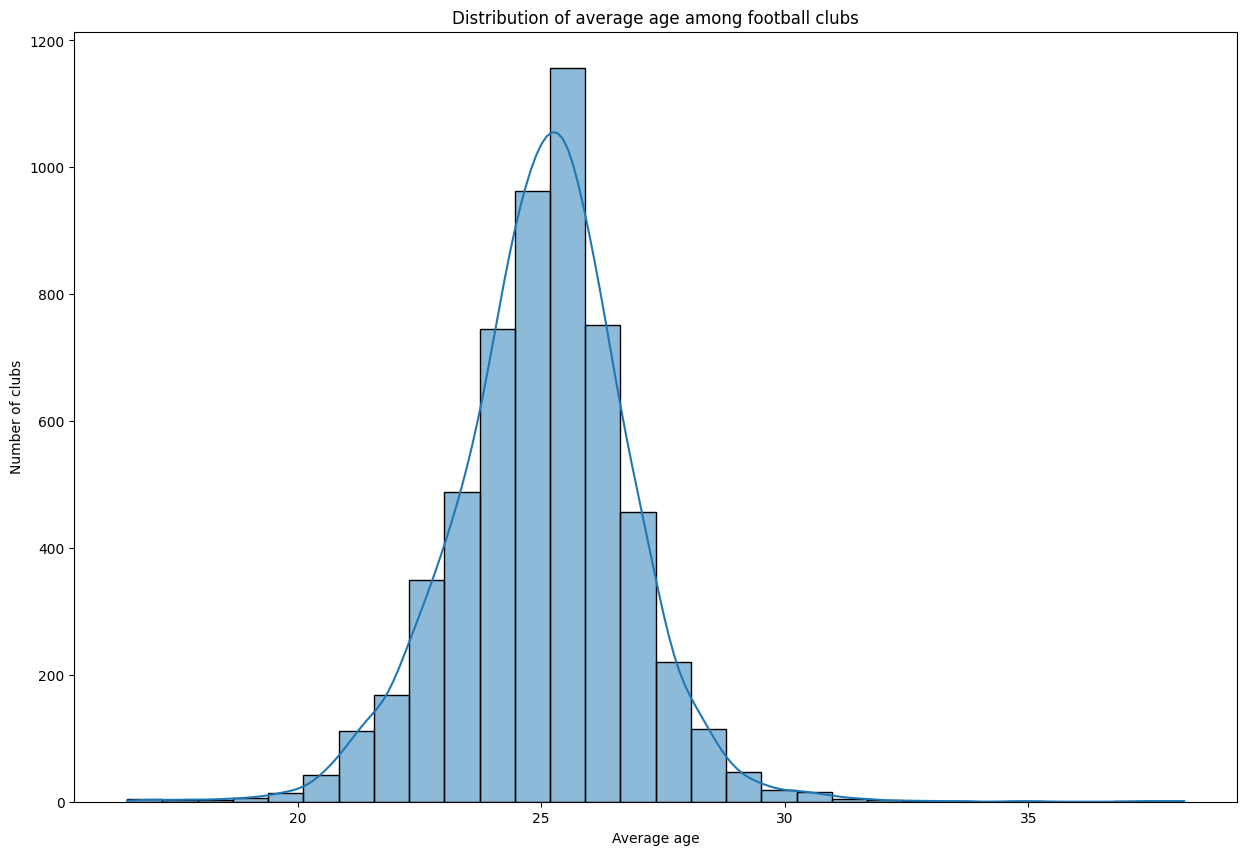

In [17]:
# Now visualize findings
plt.figure(figsize=(15, 10))
sns.histplot(data=clubs_info_df, x="AverageAge", bins=30, kde=True)
plt.title("Distribution of average age among football clubs")
plt.xlabel("Average age")
plt.ylabel("Number of clubs")
None

In [18]:
# Get mode
clubs_info_df.AverageAge.mode()

0    25.5
Name: AverageAge, dtype: float64

In [19]:
# Write results to a file
with open("average_age_per_team.json", "w") as file:
    json.dump(clubs_info_df.to_dict(orient="records"), file, indent=4)